In [2]:
import torch
import gdiffusion as gd
import util
from tqdm import tqdm

device = util.util.get_device()
print(f"device: {device}")

DIFFUSION_PATH = "saved_models/peptide_model_v1-20.pt"

/home/alden/miniconda3/envs/pytorch-cuda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


device: cuda


In [3]:
diffusion = gd.create_peptide_diffusion_model(DIFFUSION_PATH, device=device)


Model created successfully
- Total parameters: 225,056,257
- Trainable parameters: 225,056,257
- Model size: 858.5 MB
- Device: cuda:0
- Model Name: LatentDiffusionModel
- Device: cuda:0
- Model Name: LatentDiffusionModel


/home/alden/Research/GDProject/gdiffusion/diffusion/load.py:114: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path)


In [ ]:
# Naive (model with no speedup): 17 seconds
# diffusion.sample(batch_size=2)

DDPM Sampling loop time step: 100%|██████████| 1000/1000 [00:17<00:00, 57.81it/s]


tensor([[[ 1.5247e+00, -6.9985e-01,  2.4909e-02,  2.3682e+00, -2.0292e-01,
          -1.5925e+00, -2.6879e-01,  3.5985e-01,  7.4679e-01, -3.7649e-01,
          -1.3082e+00, -1.3123e+00,  4.2249e-01,  1.8889e+00, -7.0360e-01,
          -9.0219e-01, -1.8103e+00, -7.7000e-01,  1.5693e+00, -1.0533e+00,
           2.1345e-01, -1.1205e+00, -1.1744e+00,  4.3914e-01, -5.5652e-01,
          -2.8611e-01,  1.3948e-01,  4.0657e-01, -5.6857e-01,  6.7162e-01,
           4.4488e-01, -8.8114e-01, -9.4795e-02,  4.8036e-01, -1.3892e+00,
          -1.0518e+00, -6.1108e-01,  1.3921e-01, -5.8731e-01,  5.9512e-02,
          -9.0287e-01,  3.2727e-01, -1.7804e+00,  1.4086e+00,  5.0058e-02,
          -2.2843e-01, -2.4100e+00, -5.1606e-01,  1.9997e+00,  4.2186e-01,
          -3.6516e-01,  3.4896e-02,  4.9445e-01,  4.7432e-03,  1.1984e+00,
          -1.0520e-01, -1.4225e-01, -9.5583e-02,  2.4579e-01, -9.0833e-02,
           1.7008e+00, -2.0624e-01, -1.0775e+00,  3.6970e-01, -1.9492e+00,
          -7.2929e-01, -1

In [ ]:
# Naive with compile: 16 seconds
# this was ran twice (since I think the compile is lazy)

# model = torch.compile(diffusion.model, mode='max-autotune')
# diffusion.model = model
# diffusion.sample(batch_size=2)

DDPM Sampling loop time step: 100%|██████████| 1000/1000 [00:16<00:00, 61.82it/s]


tensor([[[ 2.1123, -2.5658,  2.0130,  0.3525,  1.4427, -1.7318,  0.2369,
           1.3724,  1.2966,  1.0031, -1.0373,  0.2241,  0.0167, -0.4928,
          -0.0564,  0.4665,  0.3294, -1.1265,  1.0745,  0.3849,  1.5404,
           0.4409, -0.9348, -0.0933, -1.1741,  1.4778, -1.4136,  0.6016,
           0.7274,  0.4427,  2.2629, -0.8292, -1.1412, -0.7698, -1.4694,
          -0.3870,  0.4377, -0.5680, -2.0691,  0.0117,  0.3198, -0.3360,
          -0.2815,  0.8848, -0.1283, -1.6246, -0.4979, -0.3718,  0.6059,
          -0.8746, -0.0716,  0.3913,  2.0945,  0.7748,  0.9754,  2.0617,
           0.2191, -0.3928,  0.3095,  0.0100, -0.3496, -0.6400,  0.4127,
          -0.4022, -1.5098, -1.6786, -0.6084, -1.4594,  0.2944, -1.7959,
           0.4075,  1.2694,  0.3965, -0.8781,  0.2548,  1.0818, -1.9216,
          -0.5021, -0.8899, -0.1146, -0.3659, -0.5438, -1.0425,  0.2865,
          -1.2433,  0.4837,  0.4326, -0.5792,  0.1402,  0.0858, -0.5392,
           1.1090, -0.7489,  0.8345, -0.9711, -1.39

In [3]:
# diffusion = gd.create_diffusion_model(
#     unet_dim=256,
#     unet_dim_mults=(1, 2, 4),
#     diffusion_latent_dim=256,
#     diffusion_timesteps=1000,
#     clip_denoised=False, 
#     clip_min=-3.0,  
#     clip_max=3.0, 
#     model_path=None, 
#     device=device
# )


Model created successfully
- Total parameters: 67,177,985
- Trainable parameters: 67,177,985
- Model size: 256.3 MB
- Device: cuda:0
- Model Name: LatentDiffusionModel


In [ ]:
# (1, 2, 4) model: 7 seconds
# diffusion.sample(batch_size=2)

DDPM Sampling loop time step: 100%|██████████| 1000/1000 [00:07<00:00, 126.33it/s]


tensor([[[ 1.8297e-02, -3.0551e-02, -1.0101e+00, -1.0404e+00,  2.9718e+00,
          -5.5501e-01, -1.3257e+00,  7.1717e-01,  1.0876e+00, -2.8005e+00,
          -1.4327e-01, -1.1304e-01,  7.7090e-01,  1.5243e+00,  1.6861e+00,
          -1.2988e+00,  1.9047e+00,  7.1513e-02, -7.6263e-01,  6.9603e-02,
          -8.5400e-01,  5.1972e-01, -5.4059e-01,  6.4122e-01, -8.7262e-01,
           2.8099e-02,  1.2700e+00, -3.0099e-02, -7.7861e-02,  9.3900e-01,
           1.0645e+00, -2.2252e+00,  7.3867e-01, -8.5805e-01,  2.0250e+00,
          -1.6571e-01,  7.3018e-01,  8.1363e-03, -8.3010e-01, -6.5596e-01,
          -2.7986e-01,  7.1660e-01, -3.3326e-01,  1.2946e+00,  2.2603e-01,
           5.1594e-01, -4.0277e-01, -7.3371e-01,  3.0542e-01,  8.6535e-01,
           1.2477e-01,  2.3335e-01, -7.0900e-01, -4.1587e-01,  1.9966e-01,
          -2.8191e+00,  8.8492e-01,  2.8825e-01,  2.2059e+00,  9.8565e-01,
          -2.4210e-01, -1.1288e+00,  7.1775e-01,  1.9800e+00,  1.0580e+00,
          -1.8792e+00,  9

In [ ]:
# %load_ext line_profiler

# def diffusion_sample():
#     z = diffusion.sample(batch_size=2).reshape(-1, 256)
#     return z

# # Profile the function directly
# %prun -s tottime diffusion_sample()

In [ ]:
# import gdiffusion as gd
# device = 'cuda'
# diffusion = gd.create_peptide_diffusion_model(None, device=device)
# unet = diffusion.model


Model created successfully
- Total parameters: 225,056,257
- Trainable parameters: 225,056,257
- Model size: 858.5 MB
- Device: cuda:0
- Model Name: LatentDiffusionModel
- Device: cuda:0
- Model Name: LatentDiffusionModel


In [4]:
# slowdown is definitely in the unet
%load_ext line_profiler
def mock_forward_many(batch_size=2, t=500):
    for t in tqdm(range(1000)):
        batched_times = torch.full((batch_size,), t, device='cuda', dtype=torch.long)
        diffusion.model(torch.randn((2, 1, 256), device='cuda'), batched_times)

%prun -s tottime mock_forward_many()


  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:17<00:00, 57.50it/s]

         4185673 function calls (3509328 primitive calls) in 17.396 seconds

   Ordered by: internal time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
    75000    4.039    0.000    4.039    0.000 {built-in method torch.conv1d}
    55000    2.186    0.000    5.003    0.000 unet1d.py:70(forward)
    55000    0.992    0.000    0.992    0.000 {method 'clamp_min' of 'torch._C.TensorBase' objects}
        1    0.891    0.891   17.395   17.395 3057749799.py:3(mock_forward_many)
    18000    0.860    0.000    0.860    0.000 {built-in method torch.einsum}
    57000    0.847    0.000    0.847    0.000 {built-in method torch._C._nn.silu}
    17000    0.790    0.000    0.790    0.000 {method 'softmax' of 'torch._C.TensorBase' objects}
    55000    0.749    0.000    0.749    0.000 {built-in method torch._C._linalg.linalg_vector_norm}
339000/1000    0.680    0.000   16.208    0.016 module.py:1740(_call_impl)
    55000    0.541    0.000    2.766    0.000 functional.py:534

In [ ]:
# import math

# import torch
# from torch import nn, einsum
# import torch.nn.functional as F

# from einops import rearrange

# from gdiffusion.diffusion.util import *

# class Residual(nn.Module):
#     def __init__(self, fn):
#         super().__init__()
#         self.fn = fn

#     def forward(self, x, *args, **kwargs):
#         return self.fn(x, *args, **kwargs) + x
    

# # sin pos emb

# class SinusoidalPosEmb(nn.Module):
#     def __init__(self, dim):
#         super().__init__()
#         self.dim = dim

#     def forward(self, x):
#         device = x.device
#         half_dim = self.dim // 2
#         emb = math.log(10000) / (half_dim - 1)
#         emb = torch.exp(torch.arange(half_dim, device=device) * -emb)
#         emb = x[:, None] * emb[None, :]
#         emb = torch.cat((emb.sin(), emb.cos()), dim=-1)
#         return emb

# class RandomOrLearnedSinusoidalPosEmb(nn.Module):
#     """ following @crowsonkb 's lead with random (learned optional) sinusoidal pos emb """
#     """ https://github.com/crowsonkb/v-diffusion-jax/blob/master/diffusion/models/danbooru_128.py#L8 """

#     def __init__(self, dim, is_random = False):
#         super().__init__()
#         assert (dim % 2) == 0
#         half_dim = dim // 2
#         self.weights = nn.Parameter(torch.randn(half_dim), requires_grad = not is_random)

#     def forward(self, x):
#         x = rearrange(x, 'b -> b 1')
#         freqs = x * rearrange(self.weights, 'd -> 1 d') * 2 * math.pi
#         fouriered = torch.cat((freqs.sin(), freqs.cos()), dim = -1)
#         fouriered = torch.cat((x, fouriered), dim = -1)
#         return fouriered

# # changed nn.Conv2d to nn.Conv1d
# def Upsample(dim, dim_out = None):
#     return nn.Sequential(
#         nn.Upsample(scale_factor = 2, mode = 'nearest'),
#         nn.Conv1d(dim, default(dim_out, dim), 3, padding = 1)
#     )

# # changed nn.Conv2d to nn.Conv1d
# # got rid of Rearrange string
# def Downsample(dim, dim_out = None):
#     return nn.Conv1d(dim , default(dim_out, dim), 4, 2, 1)

# class RMSNorm(nn.Module):
#     def __init__(self, dim):
#         super().__init__()
#         self.g = nn.Parameter(torch.ones(1, dim, 1))

#     def forward(self, x):
#         return F.normalize(x, dim = 1) * self.g * (x.shape[1] ** 0.5)

# class PreNorm(nn.Module):
#     def __init__(self, dim, fn):
#         super().__init__()
#         self.fn = fn
#         self.norm = RMSNorm(dim)

#     def forward(self, x):
#         x = self.norm(x)
#         return self.fn(x)

# # building block modules

# class Block(nn.Module):
#     def __init__(self, dim, dim_out):
#         super().__init__()
#         self.proj = nn.Conv1d(dim, dim_out, 3, padding = 1)
#         self.norm = RMSNorm(dim_out)
#         self.act = nn.SiLU()
#         # no dropout

#     def forward(self, x, scale_shift = None):
#         x = self.proj(x)
#         x = self.norm(x)

#         if exists(scale_shift):
#             scale, shift = scale_shift
#             x = x * (scale + 1) + shift

#         x = self.act(x)
#         return x

# class ResnetBlock(nn.Module):
#     def __init__(self, dim, dim_out, *, time_emb_dim = None):
#         super().__init__()
#         self.mlp = nn.Sequential(
#             nn.SiLU(),
#             nn.Linear(time_emb_dim, dim_out * 2)
#         ) if exists(time_emb_dim) else None

#         self.block1 = Block(dim, dim_out)
#         self.block2 = Block(dim_out, dim_out)
#         self.res_conv = nn.Conv1d(dim, dim_out, 1) if dim != dim_out else nn.Identity()

#     def forward(self, x, time_emb = None):

#         scale_shift = None
#         if exists(self.mlp) and exists(time_emb):
#             time_emb = self.mlp(time_emb)
#             time_emb = rearrange(time_emb, 'b c -> b c 1')
#             scale_shift = time_emb.chunk(2, dim = 1)

#         h = self.block1(x, scale_shift = scale_shift)

#         h = self.block2(h)

#         return h + self.res_conv(x)

# class LinearAttention(nn.Module):
#     def __init__(self, dim, heads = 4, dim_head = 32):
#         super().__init__()
#         self.scale = dim_head ** -0.5
#         self.heads = heads
#         hidden_dim = dim_head * heads
#         self.to_qkv = nn.Conv1d(dim, hidden_dim * 3, 1, bias = False)

#         self.to_out = nn.Sequential(
#             nn.Conv1d(hidden_dim, dim, 1),
#             RMSNorm(dim)
#         )

#     def forward(self, x):
#         b, c, n = x.shape
#         qkv = self.to_qkv(x).chunk(3, dim = 1)
#         q, k, v = map(lambda t: rearrange(t, 'b (h c) n -> b h c n', h = self.heads), qkv)

#         q = q.softmax(dim = -2)
#         k = k.softmax(dim = -1)

#         q = q * self.scale

#         context = torch.einsum('b h d n, b h e n -> b h d e', k, v)

#         out = torch.einsum('b h d e, b h d n -> b h e n', context, q)
#         out = rearrange(out, 'b h c n -> b (h c) n', h = self.heads)
#         return self.to_out(out)

# class Attention(nn.Module):
#     def __init__(self, dim, heads = 4, dim_head = 32):
#         super().__init__()
#         self.scale = dim_head ** -0.5
#         self.heads = heads
#         hidden_dim = dim_head * heads

#         self.to_qkv = nn.Conv1d(dim, hidden_dim * 3, 1, bias = False)
#         self.to_out = nn.Conv1d(hidden_dim, dim, 1)

#     def forward(self, x):
#         b, c, n = x.shape
#         qkv = self.to_qkv(x).chunk(3, dim = 1)
#         q, k, v = map(lambda t: rearrange(t, 'b (h c) n -> b h c n', h = self.heads), qkv)

#         q = q * self.scale

#         sim = einsum('b h d i, b h d j -> b h i j', q, k)
#         attn = sim.softmax(dim = -1)
#         out = einsum('b h i j, b h d j -> b h i d', attn, v)

#         out = rearrange(out, 'b h n d -> b (h d) n')
#         return self.to_out(out)

# # model

# class Unet1D(nn.Module):
#     def __init__(
#         self,
#         dim,
#         init_dim = None,
#         out_dim = None,
#         dim_mults=(1, 2, 4, 8),
#         channels = 3,
#         self_condition = False,
#         learned_variance = False,
#         learned_sinusoidal_cond = False,
#         random_fourier_features = False,
#         learned_sinusoidal_dim = 16
#     ):
#         super().__init__()

#         # determine dimensions

#         self.channels = channels
#         self.self_condition = self_condition
#         input_channels = channels * (2 if self_condition else 1)

#         init_dim = default(init_dim, dim)
#         self.init_conv = nn.Conv1d(input_channels, init_dim, 7, padding = 3)

#         dims = [init_dim, *map(lambda m: dim * m, dim_mults)]
#         in_out = list(zip(dims[:-1], dims[1:]))

#         # time embeddings

#         time_dim = dim * 4

#         self.random_or_learned_sinusoidal_cond = learned_sinusoidal_cond or random_fourier_features

#         if self.random_or_learned_sinusoidal_cond:
#             sinu_pos_emb = RandomOrLearnedSinusoidalPosEmb(learned_sinusoidal_dim, random_fourier_features)
#             fourier_dim = learned_sinusoidal_dim + 1
#         else:
#             sinu_pos_emb = SinusoidalPosEmb(dim)
#             fourier_dim = dim

#         self.time_mlp = nn.Sequential(
#             sinu_pos_emb,
#             nn.Linear(fourier_dim, time_dim),
#             nn.GELU(),
#             nn.Linear(time_dim, time_dim)
#         )

#         # layers

#         self.downs = nn.ModuleList([])
#         self.ups = nn.ModuleList([])
#         num_resolutions = len(in_out)

#         for ind, (dim_in, dim_out) in enumerate(in_out):
#             is_last = ind >= (num_resolutions - 1)

#             self.downs.append(nn.ModuleList([
#                 ResnetBlock(dim_in, dim_in, time_emb_dim = time_dim),
#                 ResnetBlock(dim_in, dim_in, time_emb_dim = time_dim),
#                 Residual(PreNorm(dim_in, LinearAttention(dim_in))),
#                 Downsample(dim_in, dim_out) if not is_last else nn.Conv1d(dim_in, dim_out, 3, padding = 1)
#             ]))

#         mid_dim = dims[-1]
#         self.mid_block1 = ResnetBlock(mid_dim, mid_dim, time_emb_dim = time_dim)
#         self.mid_attn = Residual(PreNorm(mid_dim, Attention(mid_dim)))
#         self.mid_block2 = ResnetBlock(mid_dim, mid_dim, time_emb_dim = time_dim)

#         for ind, (dim_in, dim_out) in enumerate(reversed(in_out)):
#             is_last = ind == (len(in_out) - 1)

#             self.ups.append(nn.ModuleList([
#                 ResnetBlock(dim_out + dim_in, dim_out, time_emb_dim = time_dim),
#                 ResnetBlock(dim_out + dim_in, dim_out, time_emb_dim = time_dim),
#                 Residual(PreNorm(dim_out, LinearAttention(dim_out))),
#                 Upsample(dim_out, dim_in) if not is_last else  nn.Conv1d(dim_out, dim_in, 3, padding = 1)
#             ]))

#         default_out_dim = channels * (1 if not learned_variance else 2)
#         self.out_dim = default(out_dim, default_out_dim)

#         self.final_res_block = ResnetBlock(init_dim * 2, init_dim, time_emb_dim = time_dim)
#         self.final_conv = nn.Conv1d(init_dim, self.out_dim, 1)

#     def forward(self, x, time, x_self_cond = None):
#         if self.self_condition:
#             x_self_cond = default(x_self_cond, lambda: torch.zeros_like(x))
#             x = torch.cat((x_self_cond, x), dim = 1)

#         x = self.init_conv(x)
#         r = x.clone()

#         t = self.time_mlp(time)

#         h = []

#         for block1, block2, attn, downsample in self.downs:
#             x = block1(x, t)
#             h.append(x)

#             x = block2(x, t)
#             x = attn(x)
#             h.append(x)

#             x = downsample(x)

#         x = self.mid_block1(x, t)
#         x = self.mid_attn(x)
#         x = self.mid_block2(x, t)

#         for block1, block2, attn, upsample in self.ups:
#             x = torch.cat((x, h.pop()), dim = 1)
#             x = block1(x, t)

#             x = torch.cat((x, h.pop()), dim = 1)
#             x = block2(x, t)
#             x = attn(x)

#             x = upsample(x)

#         x = torch.cat((x, r), dim = 1)

#         x = self.final_res_block(x, t)
#         return self.final_conv(x)


/home/alden/miniconda3/envs/pytorch-cuda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
import math
from pathlib import Path
from random import random
from functools import partial
from collections import namedtuple
from multiprocessing import cpu_count

import torch
from torch import nn, einsum, Tensor
from torch.nn import Module, ModuleList
import torch.nn.functional as F
from torch.amp import autocast
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader

from einops import rearrange, reduce
from einops.layers.torch import Rearrange

from ema_pytorch import EMA

from tqdm.auto import tqdm


# constants

ModelPrediction =  namedtuple('ModelPrediction', ['pred_noise', 'pred_x_start'])

# helpers functions

def exists(x):
    return x is not None

def default(val, d):
    if exists(val):
        return val
    return d() if callable(d) else d

def identity(t, *args, **kwargs):
    return t

def cycle(dl):
    while True:
        for data in dl:
            yield data

def has_int_squareroot(num):
    return (math.sqrt(num) ** 2) == num

def num_to_groups(num, divisor):
    groups = num // divisor
    remainder = num % divisor
    arr = [divisor] * groups
    if remainder > 0:
        arr.append(remainder)
    return arr

def convert_image_to_fn(img_type, image):
    if image.mode != img_type:
        return image.convert(img_type)
    return image

# normalization functions

def normalize_to_neg_one_to_one(img):
    return img * 2 - 1

def unnormalize_to_zero_to_one(t):
    return (t + 1) * 0.5

# data

class Dataset1D(Dataset):
    def __init__(self, tensor: Tensor):
        super().__init__()
        self.tensor = tensor.clone()

    def __len__(self):
        return len(self.tensor)

    def __getitem__(self, idx):
        return self.tensor[idx].clone()

# small helper modules

class Residual(Module):
    def __init__(self, fn):
        super().__init__()
        self.fn = fn

    def forward(self, x, *args, **kwargs):
        return self.fn(x, *args, **kwargs) + x

def Upsample(dim, dim_out = None):
    return nn.Sequential(
        nn.Upsample(scale_factor = 2, mode = 'nearest'),
        nn.Conv1d(dim, default(dim_out, dim), 3, padding = 1)
    )

def Downsample(dim, dim_out = None):
    return nn.Conv1d(dim, default(dim_out, dim), 4, 2, 1)

class RMSNorm(Module):
    def __init__(self, dim):
        super().__init__()
        self.g = nn.Parameter(torch.ones(1, dim, 1))

    def forward(self, x):
        return F.normalize(x, dim = 1) * self.g * (x.shape[1] ** 0.5)

class PreNorm(Module):
    def __init__(self, dim, fn):
        super().__init__()
        self.fn = fn
        self.norm = RMSNorm(dim)

    def forward(self, x):
        x = self.norm(x)
        return self.fn(x)

# sinusoidal positional embeds

class SinusoidalPosEmb(Module):
    def __init__(self, dim, theta = 10000):
        super().__init__()
        self.dim = dim
        self.theta = theta

    def forward(self, x):
        device = x.device
        half_dim = self.dim // 2
        emb = math.log(self.theta) / (half_dim - 1)
        emb = torch.exp(torch.arange(half_dim, device=device) * -emb)
        emb = x[:, None] * emb[None, :]
        emb = torch.cat((emb.sin(), emb.cos()), dim=-1)
        return emb

class RandomOrLearnedSinusoidalPosEmb(Module):
    """ following @crowsonkb 's lead with random (learned optional) sinusoidal pos emb """
    """ https://github.com/crowsonkb/v-diffusion-jax/blob/master/diffusion/models/danbooru_128.py#L8 """

    def __init__(self, dim, is_random = False):
        super().__init__()
        assert (dim % 2) == 0
        half_dim = dim // 2
        self.weights = nn.Parameter(torch.randn(half_dim), requires_grad = not is_random)

    def forward(self, x):
        x = rearrange(x, 'b -> b 1')
        freqs = x * rearrange(self.weights, 'd -> 1 d') * 2 * math.pi
        fouriered = torch.cat((freqs.sin(), freqs.cos()), dim = -1)
        fouriered = torch.cat((x, fouriered), dim = -1)
        return fouriered

# building block modules

class Block(Module):
    def __init__(self, dim, dim_out, dropout = 0.):
        super().__init__()
        self.proj = nn.Conv1d(dim, dim_out, 3, padding = 1)
        self.norm = RMSNorm(dim_out)
        self.act = nn.SiLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, scale_shift = None):
        x = self.proj(x)
        x = self.norm(x)

        if exists(scale_shift):
            scale, shift = scale_shift
            x = x * (scale + 1) + shift

        x = self.act(x)
        return self.dropout(x)

class ResnetBlock(Module):
    def __init__(self, dim, dim_out, *, time_emb_dim = None, dropout = 0.):
        super().__init__()
        self.mlp = nn.Sequential(
            nn.SiLU(),
            nn.Linear(time_emb_dim, dim_out * 2)
        ) if exists(time_emb_dim) else None

        self.block1 = Block(dim, dim_out, dropout = dropout)
        self.block2 = Block(dim_out, dim_out)
        self.res_conv = nn.Conv1d(dim, dim_out, 1) if dim != dim_out else nn.Identity()

    def forward(self, x, time_emb = None):

        scale_shift = None
        if exists(self.mlp) and exists(time_emb):
            time_emb = self.mlp(time_emb)
            time_emb = rearrange(time_emb, 'b c -> b c 1')
            scale_shift = time_emb.chunk(2, dim = 1)

        h = self.block1(x, scale_shift = scale_shift)

        h = self.block2(h)

        return h + self.res_conv(x)

class LinearAttention(Module):
    def __init__(self, dim, heads = 4, dim_head = 32):
        super().__init__()
        self.scale = dim_head ** -0.5
        self.heads = heads
        hidden_dim = dim_head * heads
        self.to_qkv = nn.Conv1d(dim, hidden_dim * 3, 1, bias = False)

        self.to_out = nn.Sequential(
            nn.Conv1d(hidden_dim, dim, 1),
            RMSNorm(dim)
        )

    def forward(self, x):
        b, c, n = x.shape
        qkv = self.to_qkv(x).chunk(3, dim = 1)
        q, k, v = map(lambda t: rearrange(t, 'b (h c) n -> b h c n', h = self.heads), qkv)

        q = q.softmax(dim = -2)
        k = k.softmax(dim = -1)

        q = q * self.scale        

        context = torch.einsum('b h d n, b h e n -> b h d e', k, v)

        out = torch.einsum('b h d e, b h d n -> b h e n', context, q)
        out = rearrange(out, 'b h c n -> b (h c) n', h = self.heads)
        return self.to_out(out)

class Attention(Module):
    def __init__(self, dim, heads = 4, dim_head = 32):
        super().__init__()
        self.scale = dim_head ** -0.5
        self.heads = heads
        hidden_dim = dim_head * heads

        self.to_qkv = nn.Conv1d(dim, hidden_dim * 3, 1, bias = False)
        self.to_out = nn.Conv1d(hidden_dim, dim, 1)

    def forward(self, x):
        b, c, n = x.shape
        qkv = self.to_qkv(x).chunk(3, dim = 1)
        q, k, v = map(lambda t: rearrange(t, 'b (h c) n -> b h c n', h = self.heads), qkv)

        q = q * self.scale

        sim = einsum('b h d i, b h d j -> b h i j', q, k)
        attn = sim.softmax(dim = -1)
        out = einsum('b h i j, b h d j -> b h i d', attn, v)

        out = rearrange(out, 'b h n d -> b (h d) n')
        return self.to_out(out)

# model

class Unet1D(Module):
    def __init__(
        self,
        dim,
        init_dim = None,
        out_dim = None,
        dim_mults=(1, 2, 4, 8),
        channels = 3,
        dropout = 0.,
        self_condition = False,
        learned_variance = False,
        learned_sinusoidal_cond = False,
        random_fourier_features = False,
        learned_sinusoidal_dim = 16,
        sinusoidal_pos_emb_theta = 10000,
        attn_dim_head = 32,
        attn_heads = 4
    ):
        super().__init__()

        # determine dimensions

        self.channels = channels
        self.self_condition = self_condition
        input_channels = channels * (2 if self_condition else 1)

        init_dim = default(init_dim, dim)
        self.init_conv = nn.Conv1d(input_channels, init_dim, 7, padding = 3)

        dims = [init_dim, *map(lambda m: dim * m, dim_mults)]
        in_out = list(zip(dims[:-1], dims[1:]))

        # time embeddings

        time_dim = dim * 4

        self.random_or_learned_sinusoidal_cond = learned_sinusoidal_cond or random_fourier_features

        if self.random_or_learned_sinusoidal_cond:
            sinu_pos_emb = RandomOrLearnedSinusoidalPosEmb(learned_sinusoidal_dim, random_fourier_features)
            fourier_dim = learned_sinusoidal_dim + 1
        else:
            sinu_pos_emb = SinusoidalPosEmb(dim, theta = sinusoidal_pos_emb_theta)
            fourier_dim = dim

        self.time_mlp = nn.Sequential(
            sinu_pos_emb,
            nn.Linear(fourier_dim, time_dim),
            nn.GELU(),
            nn.Linear(time_dim, time_dim)
        )

        resnet_block = partial(ResnetBlock, time_emb_dim = time_dim, dropout = dropout)

        # layers

        self.downs = ModuleList([])
        self.ups = ModuleList([])
        num_resolutions = len(in_out)

        for ind, (dim_in, dim_out) in enumerate(in_out):
            is_last = ind >= (num_resolutions - 1)

            self.downs.append(ModuleList([
                resnet_block(dim_in, dim_in),
                resnet_block(dim_in, dim_in),
                Residual(PreNorm(dim_in, LinearAttention(dim_in))),
                Downsample(dim_in, dim_out) if not is_last else nn.Conv1d(dim_in, dim_out, 3, padding = 1)
            ]))

        mid_dim = dims[-1]
        self.mid_block1 = resnet_block(mid_dim, mid_dim)
        self.mid_attn = Residual(PreNorm(mid_dim, Attention(mid_dim, dim_head = attn_dim_head, heads = attn_heads)))
        self.mid_block2 = resnet_block(mid_dim, mid_dim)

        for ind, (dim_in, dim_out) in enumerate(reversed(in_out)):
            is_last = ind == (len(in_out) - 1)

            self.ups.append(ModuleList([
                resnet_block(dim_out + dim_in, dim_out),
                resnet_block(dim_out + dim_in, dim_out),
                Residual(PreNorm(dim_out, LinearAttention(dim_out))),
                Upsample(dim_out, dim_in) if not is_last else  nn.Conv1d(dim_out, dim_in, 3, padding = 1)
            ]))

        default_out_dim = channels * (1 if not learned_variance else 2)
        self.out_dim = default(out_dim, default_out_dim)

        self.final_res_block = resnet_block(init_dim * 2, init_dim)
        self.final_conv = nn.Conv1d(init_dim, self.out_dim, 1)

    def forward(self, x, time, x_self_cond = None):
        if self.self_condition:
            x_self_cond = default(x_self_cond, lambda: torch.zeros_like(x))
            x = torch.cat((x_self_cond, x), dim = 1)

        x = self.init_conv(x)
        r = x.clone()

        t = self.time_mlp(time)

        h = []

        for block1, block2, attn, downsample in self.downs:
            x = block1(x, t)
            h.append(x)

            x = block2(x, t)
            x = attn(x)
            h.append(x)

            x = downsample(x)

        x = self.mid_block1(x, t)
        x = self.mid_attn(x)
        x = self.mid_block2(x, t)

        for block1, block2, attn, upsample in self.ups:
            x = torch.cat((x, h.pop()), dim = 1)
            x = block1(x, t)

            x = torch.cat((x, h.pop()), dim = 1)
            x = block2(x, t)
            x = attn(x)

            x = upsample(x)

        x = torch.cat((x, r), dim = 1)

        x = self.final_res_block(x, t)
        return self.final_conv(x)


/home/alden/miniconda3/envs/pytorch-cuda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
from tqdm import tqdm

In [13]:
unet = Unet1D(
    dim=256,
    dim_mults=(1, 2, 4, 8),
    channels=1
).to('cuda')

def mock_forward(batch_size=2, t=500):
    batched_times = torch.full((batch_size,), t, device='cuda', dtype=torch.long)
    unet(torch.randn((2, 1, 256), device='cuda'), batched_times)

for t in tqdm(range(1000)):
    mock_forward(t=t)

100%|██████████| 1000/1000 [00:17<00:00, 57.46it/s]


In [14]:
from unet import UNet1D
from tqdm import tqdm
import torch
model = UNet1D(in_channels=1, out_classes=256, padding=1)

for t in tqdm(range(1000)):
    model(torch.randn(2, 1, 256))

100%|██████████| 1000/1000 [00:10<00:00, 94.55it/s]


In [16]:

for t in tqdm(range(1000)):
    model(torch.randn(2, 1, 256))

100%|██████████| 1000/1000 [00:10<00:00, 98.15it/s]


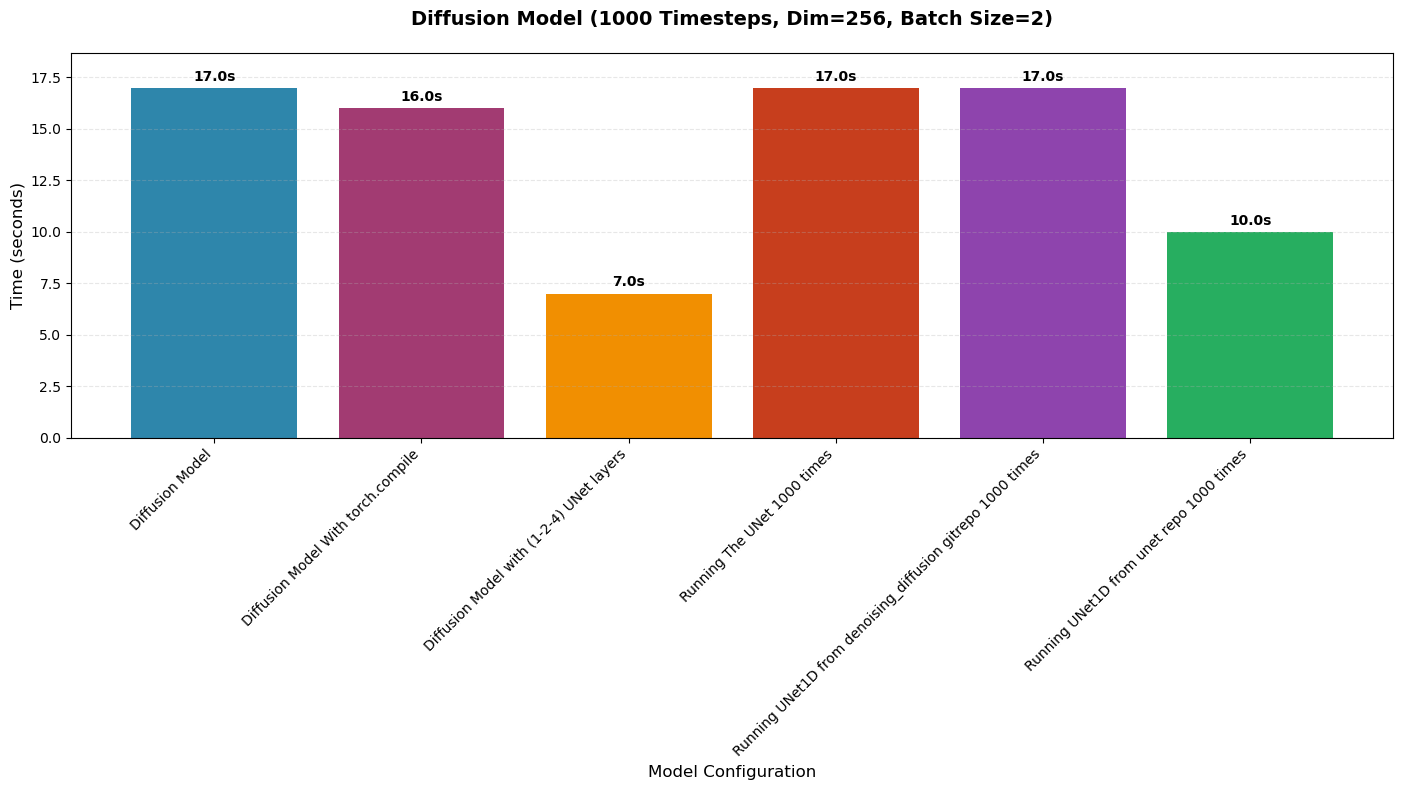

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Data
labels = [
    'Diffusion Model',
    'Diffusion Model With torch.compile',
    'Diffusion Model with (1-2-4) UNet layers',
    'Running The UNet 1000 times',
    'Running UNet1D from denoising_diffusion gitrepo 1000 times',
    'Running UNet1D from unet repo 1000 times'
]

times = [17.0, 16.0, 7.0, 17.0, 17.0, 10.0]

# Create the bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(range(len(labels)), times, color=['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#8E44AD', '#27AE60'])

# Customize the chart
plt.title('Diffusion Model (1000 Timesteps, Dim=256, Batch Size=2)', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Model Configuration', fontsize=12)
plt.ylabel('Time (seconds)', fontsize=12)

# Set x-axis labels with rotation for better readability
plt.xticks(range(len(labels)), labels, rotation=45, ha='right')

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.2,
             f'{times[i]:.1f}s', ha='center', va='bottom', fontweight='bold')

# Add grid for better readability
plt.grid(axis='y', alpha=0.3, linestyle='--')

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Set y-axis to start from 0 and add some padding at the top
plt.ylim(0, max(times) * 1.1)

plt.show()

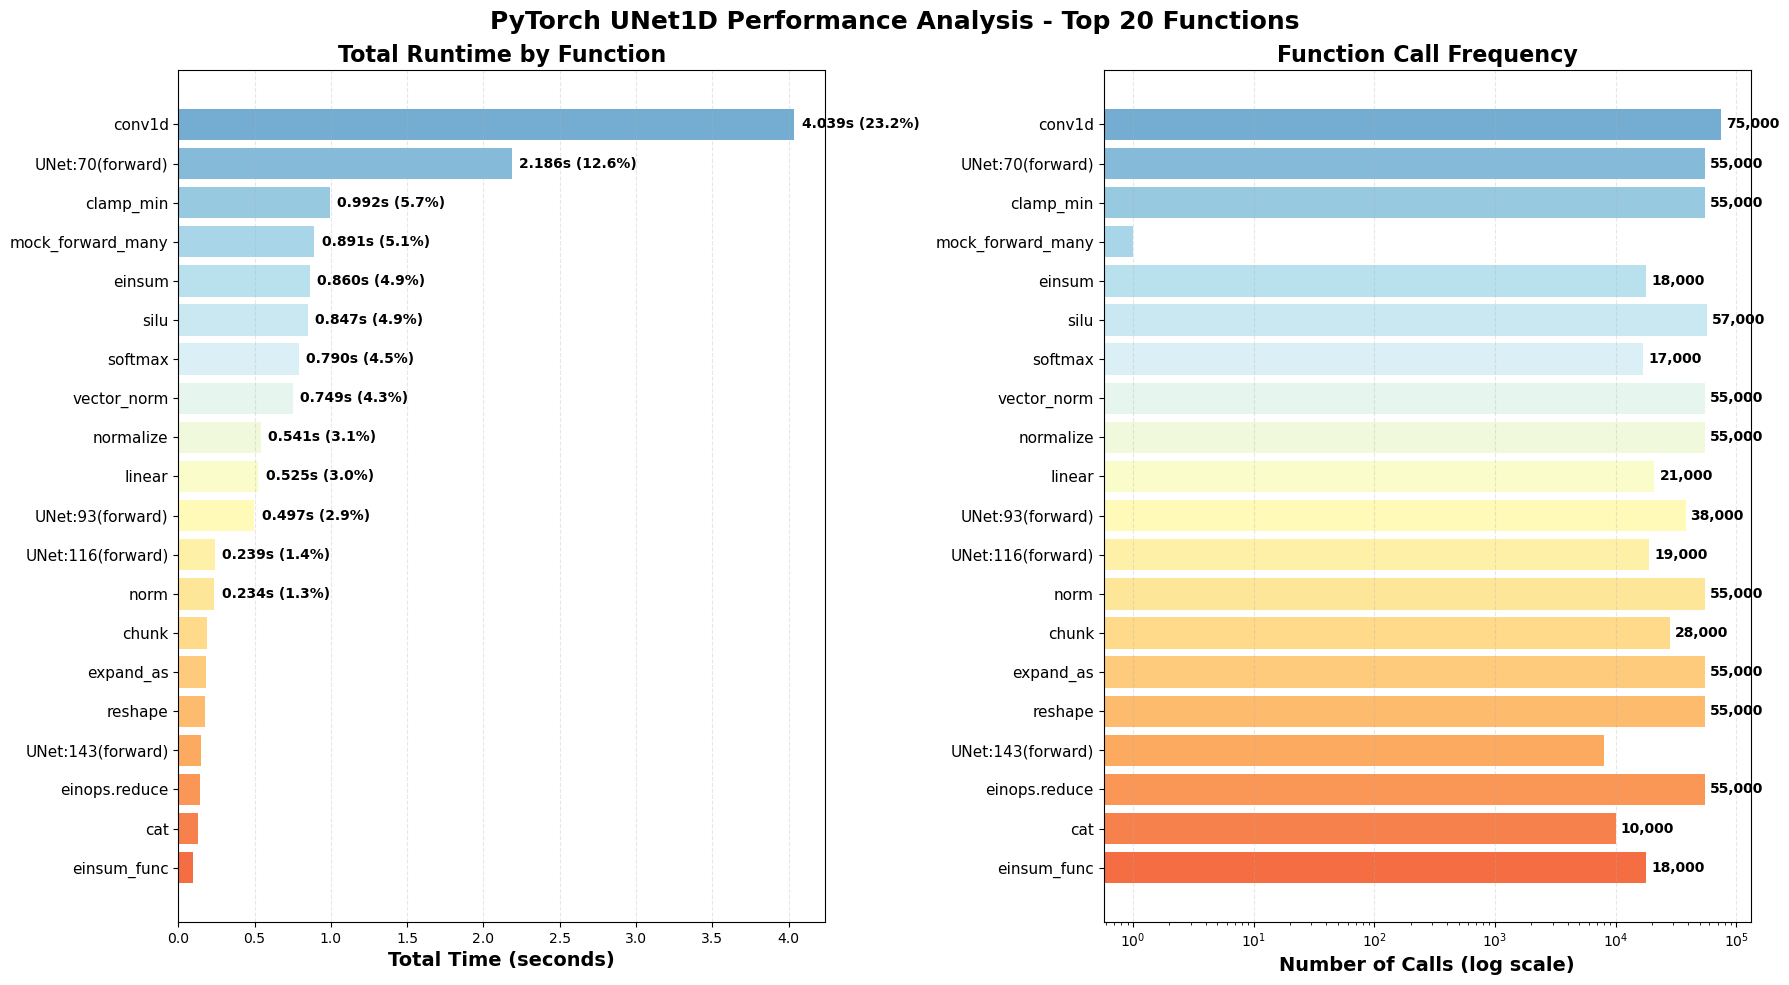


🔍 PERFORMANCE ANALYSIS SUMMARY:
Total Runtime: 17.396 seconds
Top 3 Bottlenecks:
  1. torch.conv1d: 4.039s (23.2%) - 75,000 calls
  2. UNet forward (line 70): 2.186s (12.6%) - 55,000 calls
  3. clamp_min operations: 0.992s (5.7%) - 55,000 calls

💡 Key Insights:
  • Convolution operations dominate: 23.2% of total runtime
  • UNet layers combined: 3.071s (17.7%)
  • High-frequency operations: silu (57,000 calls), tensor ops (55,000 calls)


In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Top 20 most time-consuming functions from the profiling data (excluding generic __call__ implementations)
functions = [
    'torch.conv1d',
    'unet1d.py:70(forward)',  # Main UNet forward pass
    'method clamp_min',
    'mock_forward_many',
    'torch.einsum',
    'torch._C._nn.silu',
    'method softmax',
    'torch._C._linalg.linalg_vector_norm',
    'functional.py:5343(normalize)',
    'torch._C._nn.linear',
    'unet1d.py:93(forward)',  # Another UNet layer forward
    'unet1d.py:116(forward)',  # Another UNet layer forward
    'functional.py:1671(norm)',
    'method chunk',
    'method expand_as',
    'method reshape',
    'unet1d.py:143(forward)',  # Another UNet layer forward
    'einops.py:460(reduce)',
    'torch.cat',
    'functional.py:210(einsum)'
]

# Total time spent in each function (in seconds)
times = [4.039, 2.186, 0.992, 0.891, 0.860, 0.847, 0.790, 0.749, 0.541, 0.525, 
         0.497, 0.239, 0.234, 0.191, 0.184, 0.178, 0.149, 0.139, 0.132, 0.097]

# Number of calls for each function
ncalls = [75000, 55000, 55000, 1, 18000, 57000, 17000, 55000, 55000, 21000,
          38000, 19000, 55000, 28000, 55000, 55000, 8000, 55000, 10000, 18000]

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 10))

# Color scheme - gradient from red (highest) to blue (lowest)
colors = plt.cm.RdYlBu_r(np.linspace(0.2, 0.8, len(functions)))

# Shorten function names for better display
short_names = [
    'conv1d',
    'UNet:70(forward)',
    'clamp_min',
    'mock_forward_many',
    'einsum',
    'silu',
    'softmax',
    'vector_norm',
    'normalize',
    'linear',
    'UNet:93(forward)',
    'UNet:116(forward)',
    'norm',
    'chunk',
    'expand_as',
    'reshape',
    'UNet:143(forward)',
    'einops.reduce',
    'cat',
    'einsum_func'
]

# Plot 1: Total Time
bars1 = ax1.barh(range(len(functions)), times, color=colors)
ax1.set_xlabel('Total Time (seconds)', fontsize=14, fontweight='bold')
ax1.set_title('Total Runtime by Function', fontsize=16, fontweight='bold')
ax1.set_yticks(range(len(functions)))
ax1.set_yticklabels(short_names, fontsize=11)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.invert_yaxis()

# Add percentage labels for top functions
total_time = 17.396  # Total runtime from profiling
for i, bar in enumerate(bars1):
    if times[i] >= 0.2:  # Only label functions with significant time
        percentage = (times[i] / total_time) * 100
        ax1.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2, 
                 f'{times[i]:.3f}s ({percentage:.1f}%)', 
                 ha='left', va='center', fontweight='bold', fontsize=10)

# Plot 2: Number of Calls (log scale)
bars2 = ax2.barh(range(len(functions)), ncalls, color=colors)
ax2.set_xlabel('Number of Calls (log scale)', fontsize=14, fontweight='bold')
ax2.set_title('Function Call Frequency', fontsize=16, fontweight='bold')
ax2.set_yticks(range(len(functions)))
ax2.set_yticklabels(short_names, fontsize=11)
ax2.set_xscale('log')
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.invert_yaxis()

# Add call count labels for frequently called functions
for i, bar in enumerate(bars2):
    if ncalls[i] >= 10000:  # Only label frequently called functions
        ax2.text(bar.get_width() * 1.1, bar.get_y() + bar.get_height()/2, 
                 f'{ncalls[i]:,}', ha='left', va='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.suptitle('PyTorch UNet1D Performance Analysis - Top 20 Functions', 
             fontsize=18, fontweight='bold', y=0.98)
plt.subplots_adjust(top=0.92)

plt.show()

# Print summary insights
print("\n🔍 PERFORMANCE ANALYSIS SUMMARY:")
print("=" * 50)
print(f"Total Runtime: {total_time:.3f} seconds")
print(f"Top 3 Bottlenecks:")
print(f"  1. torch.conv1d: {times[0]:.3f}s ({(times[0]/total_time)*100:.1f}%) - {ncalls[0]:,} calls")
print(f"  2. UNet forward (line 70): {times[1]:.3f}s ({(times[1]/total_time)*100:.1f}%) - {ncalls[1]:,} calls") 
print(f"  3. clamp_min operations: {times[2]:.3f}s ({(times[2]/total_time)*100:.1f}%) - {ncalls[2]:,} calls")
print(f"\n💡 Key Insights:")
print(f"  • Convolution operations dominate: {(times[0]/total_time)*100:.1f}% of total runtime")
print(f"  • UNet layers combined: {sum([times[1], times[10], times[11], times[16]]):.3f}s ({(sum([times[1], times[10], times[11], times[16]])/total_time)*100:.1f}%)")
print(f"  • High-frequency operations: silu ({ncalls[5]:,} calls), tensor ops ({ncalls[2]:,} calls)")

In [8]:
diffusion.model

Unet1D(
  (init_conv): Conv1d(1, 256, kernel_size=(7,), stride=(1,), padding=(3,))
  (time_mlp): Sequential(
    (0): SinusoidalPosEmb()
    (1): Linear(in_features=256, out_features=1024, bias=True)
    (2): GELU(approximate='none')
    (3): Linear(in_features=1024, out_features=1024, bias=True)
  )
  (downs): ModuleList(
    (0): ModuleList(
      (0-1): 2 x ResnetBlock(
        (mlp): Sequential(
          (0): SiLU()
          (1): Linear(in_features=1024, out_features=512, bias=True)
        )
        (block1): Block(
          (proj): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
          (norm): RMSNorm()
          (act): SiLU()
        )
        (block2): Block(
          (proj): Conv1d(256, 256, kernel_size=(3,), stride=(1,), padding=(1,))
          (norm): RMSNorm()
          (act): SiLU()
        )
        (res_conv): Identity()
      )
      (2): Residual(
        (fn): PreNorm(
          (fn): LinearAttention(
            (to_qkv): Conv1d(256, 384, kernel_